<a href="https://colab.research.google.com/github/Nikkuchan/CpE-AIML/blob/main/58089_LabNo04_Wagler/58089_LabNo04_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [42]:
### YOUR CODE HERE
class MultipleLinearRegression():
  
  ### Program the required methods
  # coding the correlations
  def correlations(self,X,y):
    corr = np.round(np.corrcoef(X,y,rowvar=False),2)
    values = np.reshape(corr,(1,9))
    return values[0][-4:-2]
  
  # coding the train
  def train(self,X,y):
    X = self._concatenate_ones(X)
    theta = np.round(np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y),2)
    self.theta = theta
    return (theta[-2],theta[-1],theta[0])
  
  def predict(self,X):
    X_size = len(X_test)
    self.y_hat = np.c_[np.ones((X_size,1)), X_test]
    arr = list(range(0,5))
    self.preds = np.dot(self.y_hat,self.theta)
    return print("ŷᵢ = ", self.preds, "i = ",arr)

  ### You may add other helper functions in to make your code cleaner
  def __init__(self):
    self.model_ = self.train(X,y)

  def _concatenate_ones(self,X):
    ones = np.ones(shape=X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X),1)

  def _reshape_x(self,X):
    return X.reshape(-1,1)
  
  
  def evaluate(self): #SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared.  
    y=y_train.values.reshape(-1,1)
    n = len(y)
    k = len(X)  
    y_hat = self.predict(X_train)
    sst = np.sum(np.square(y)-(y.mean()))               #Sum of Squares Total 
    ssr = np.sum(np.square(self.y_hat-y.mean()))        #Sum of Squares Regression 
    mse = np.mean(np.square(self.y_hat-y[0:5]))         #Mean of Squared Error 
    rmse = np.sqrt(mse)                                 #Root Mean Squared Error
    sse = np.sum(np.square(self.y_hat-y[0:5]))          #Sum of Squares Error
    r2 = (1-(sse/sst))                                  #R-squared
    ar2 = (1-((1-r2)*(n-1)/(n-k-1)))                    #Adjusted R-squared
    eval = {      'Sum of Squares Total      [SST] ': [sst],
                  'Sum of Squares Regression [SSR] ': [ssr],
                  'Mean of Squared Error     [MSE] ': [mse],
                  'Root Mean Squared Error   [RMSE]': [rmse],
                  'R-squared                 [R²]  ': [r2],
                  'Adjusted R-squared        [AR²] ': [ar2]}
                  

    return eval
  def visualize(self, X_test, y_test):
    X = pd.read_csv("real_estate_price_size_year.csv") 
    y = X['price']
    X = X.drop('price', axis=1)
    X = X.drop('year', axis=1)
    X_train, X_test = X.iloc[0:95], X.iloc[95:]
    y_train, y_test = y.iloc[0:95], y.iloc[95:]

    plt.figure(dpi=400) 
    plt.scatter (X,y, color='green')
    plt.savefig("realEstateData.jpg")
    plt.title("Original Values")
    plt.grid()

    plt.figure(dpi=400)
    plt.scatter (y_test,self.preds, color='orange')
    plt.plot (y_test,self.preds, color='violet')
    plt.savefig("realEstatePrediction.jpg")
    plt.title("Predicted Values")
    plt.grid()

    plt.figure(dpi=400) 
    plt.scatter (X,y,label='original values', color='b')
    plt.scatter (y_test,self.preds, label='predicted values', color='r')
    plt.title("Comparison")
    plt.legend()
    plt.grid()
    return plt.show()



In [43]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("/content/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [44]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression()

In [37]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X,y)
R

array([0.09, 0.86])

Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [45]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

(227.7, 2916.79, -5772267.02)

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56 \\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [46]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

ŷᵢ =  [212753.55  323789.178 421445.295 252680.463 239408.253] i =  [0, 1, 2, 3, 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [47]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

ŷᵢ =  [212753.55  323789.178 421445.295 252680.463 239408.253] i =  [0, 1, 2, 3, 4]


{'Adjusted R-squared        [AR²] ': [3.998061413297366],
 'Mean of Squared Error     [MSE] ': [110959347707.93648],
 'R-squared                 [R²]  ': [0.8086343778746362],
 'Root Mean Squared Error   [RMSE]': [333105.6104419985],
 'Sum of Squares Regression [SSR] ': [1274406249162.2305],
 'Sum of Squares Total      [SST] ': [8697435814927.636]}

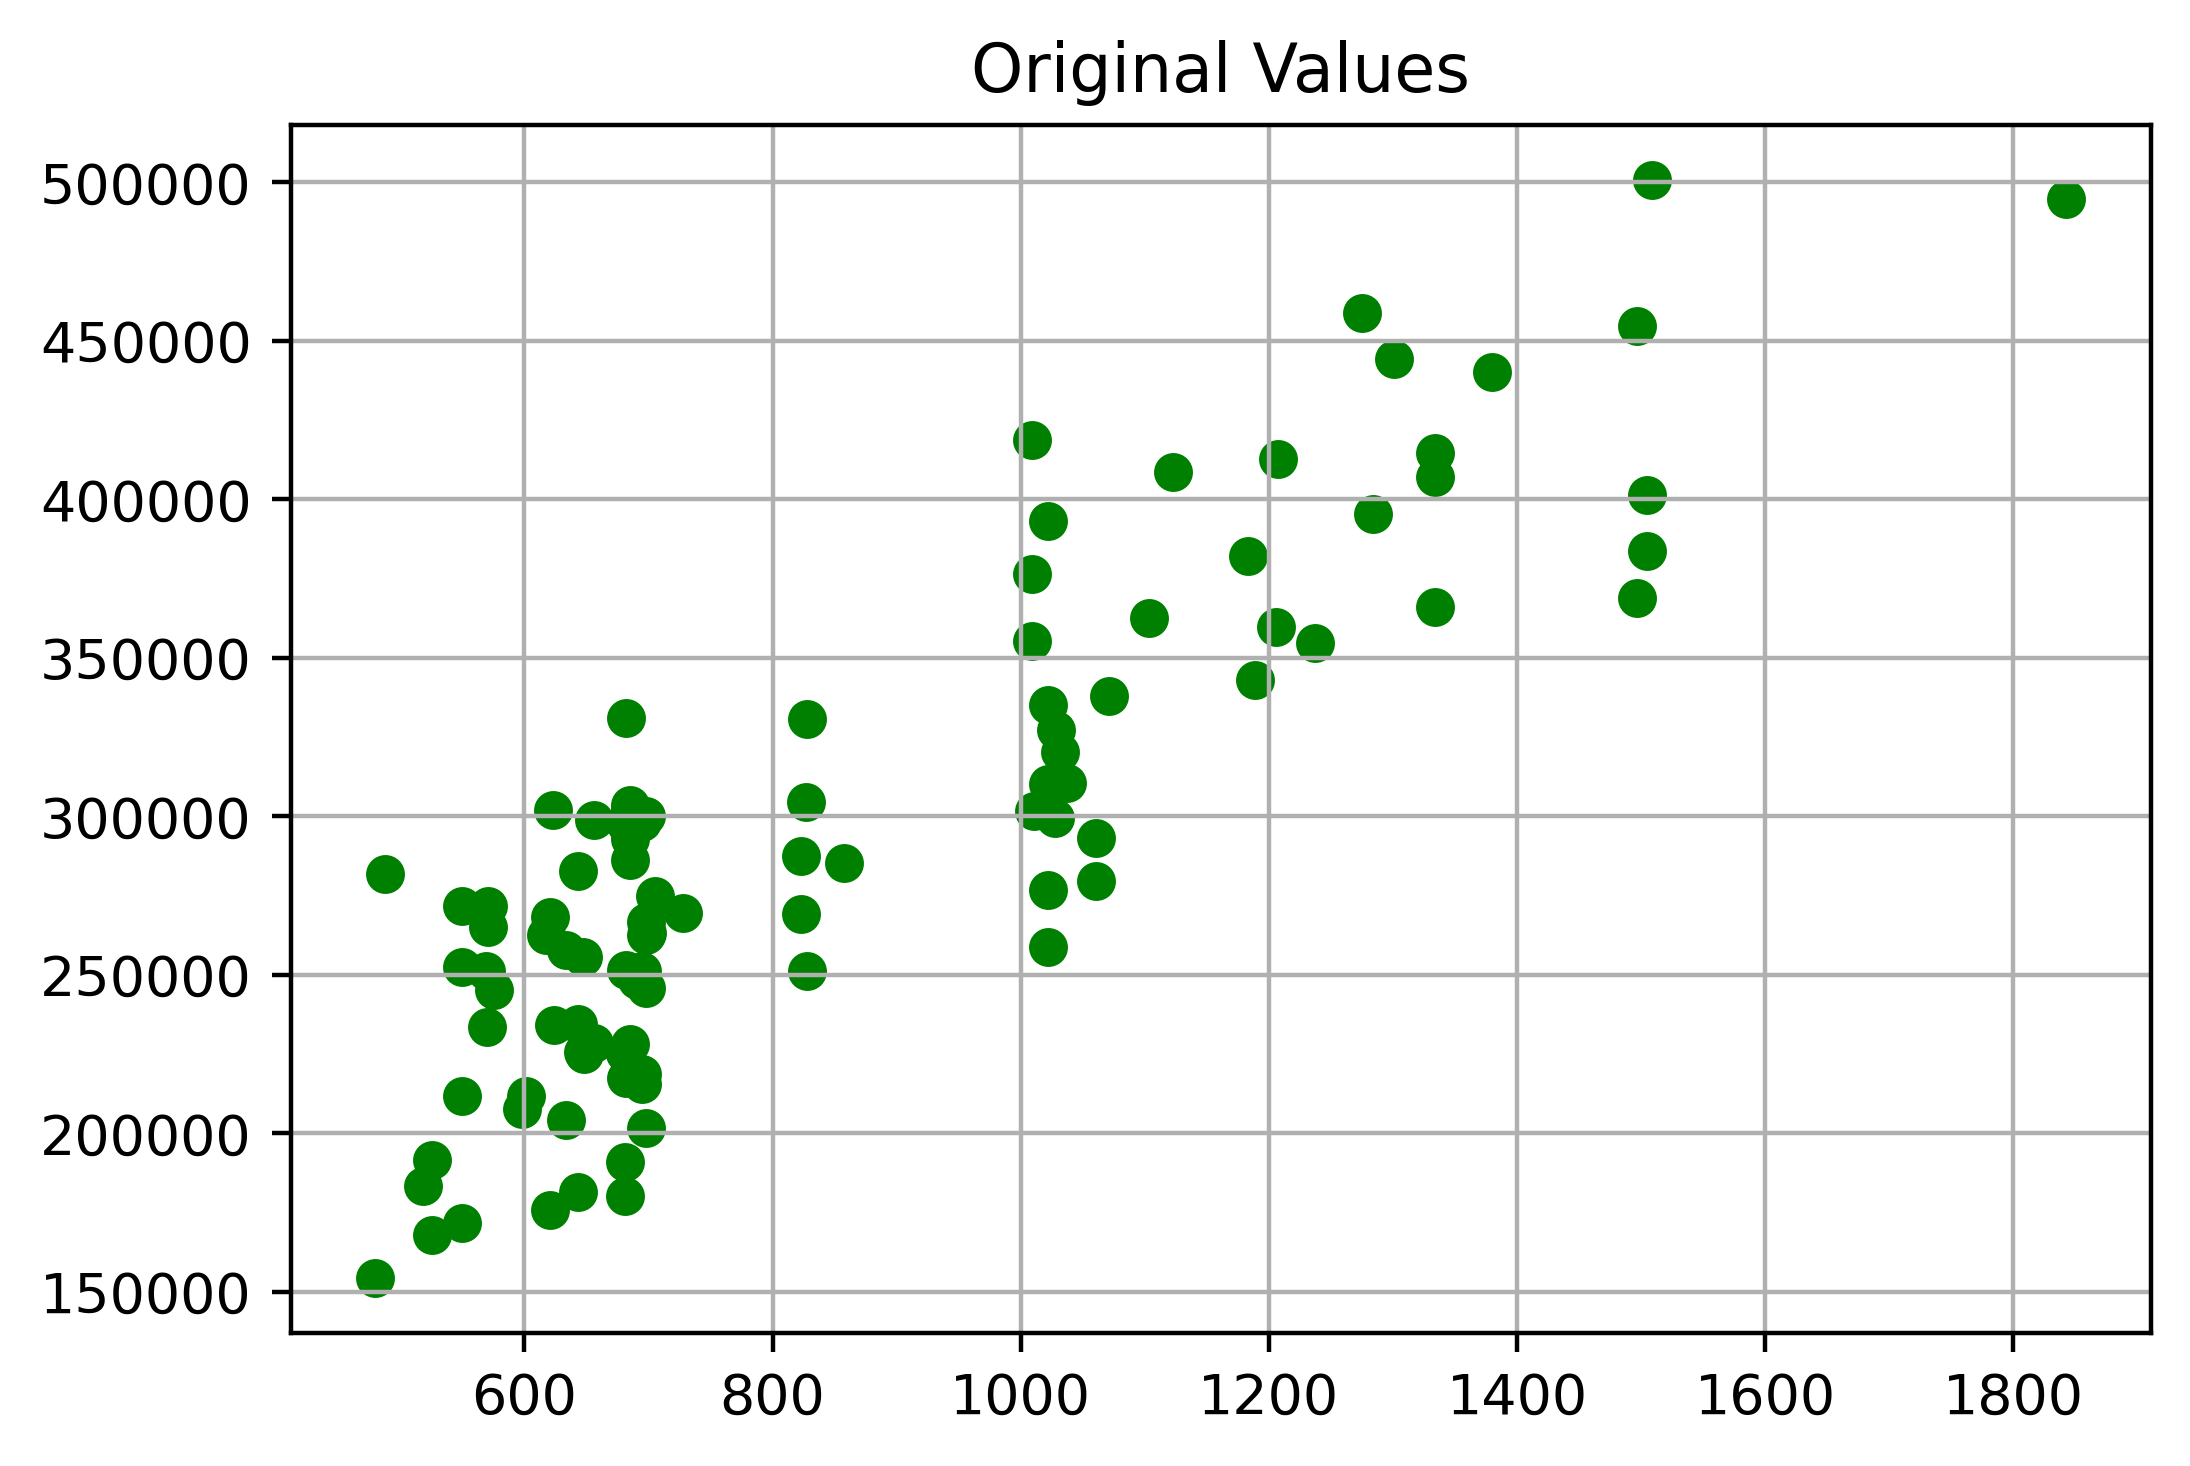

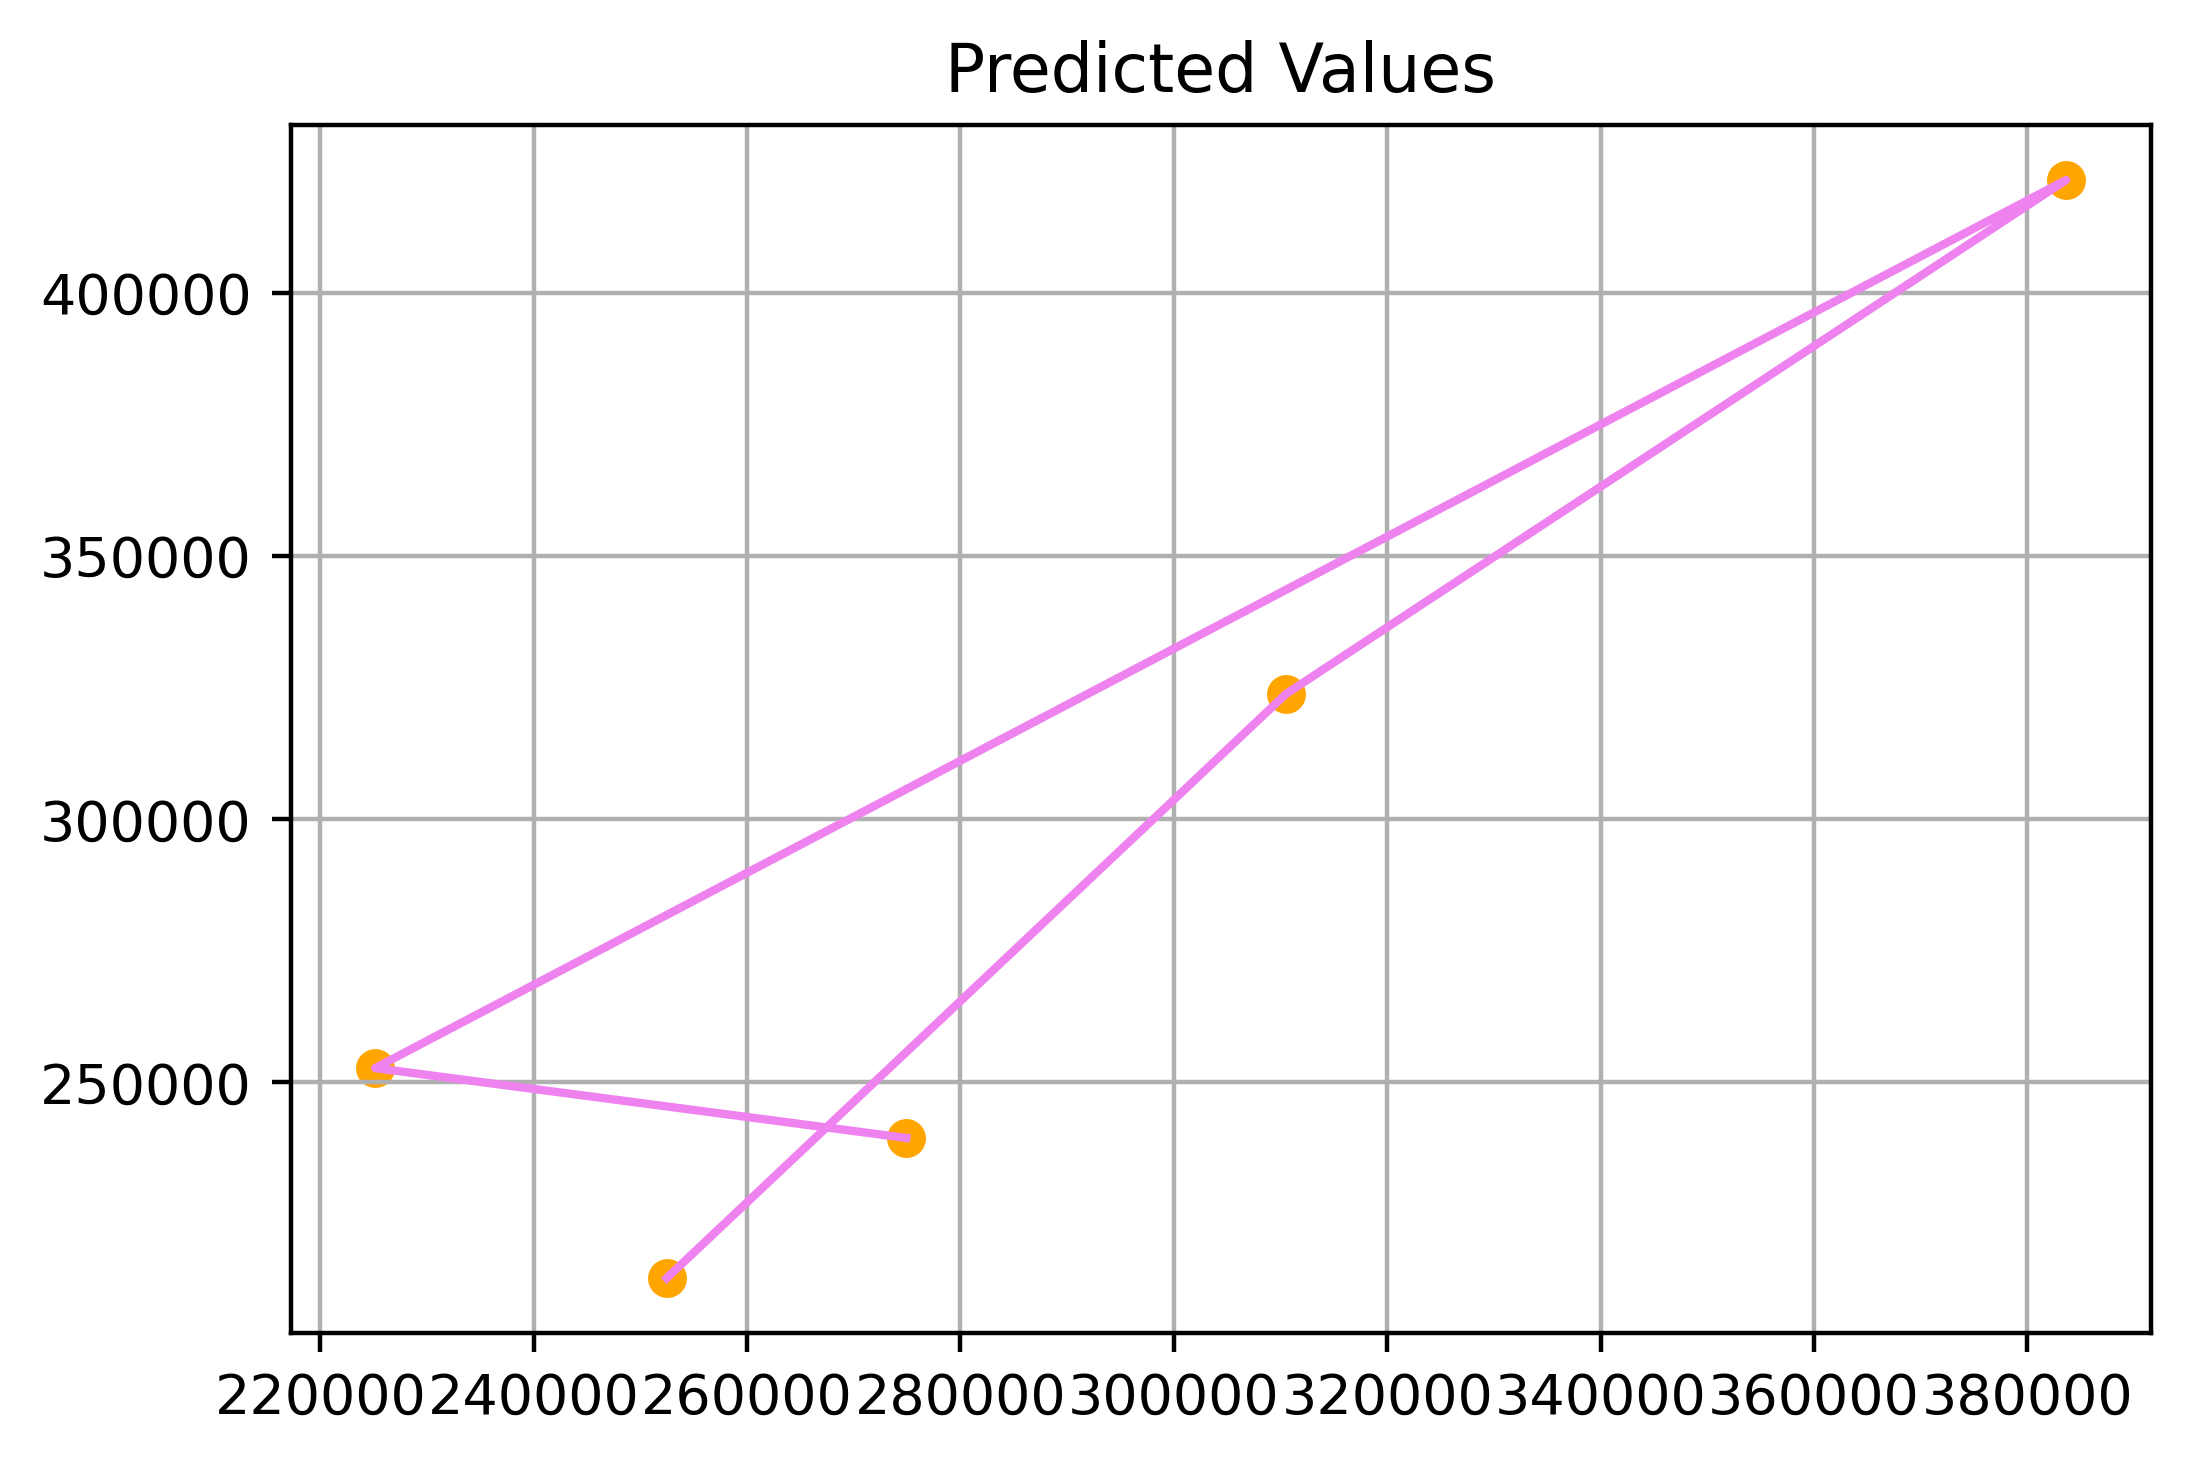

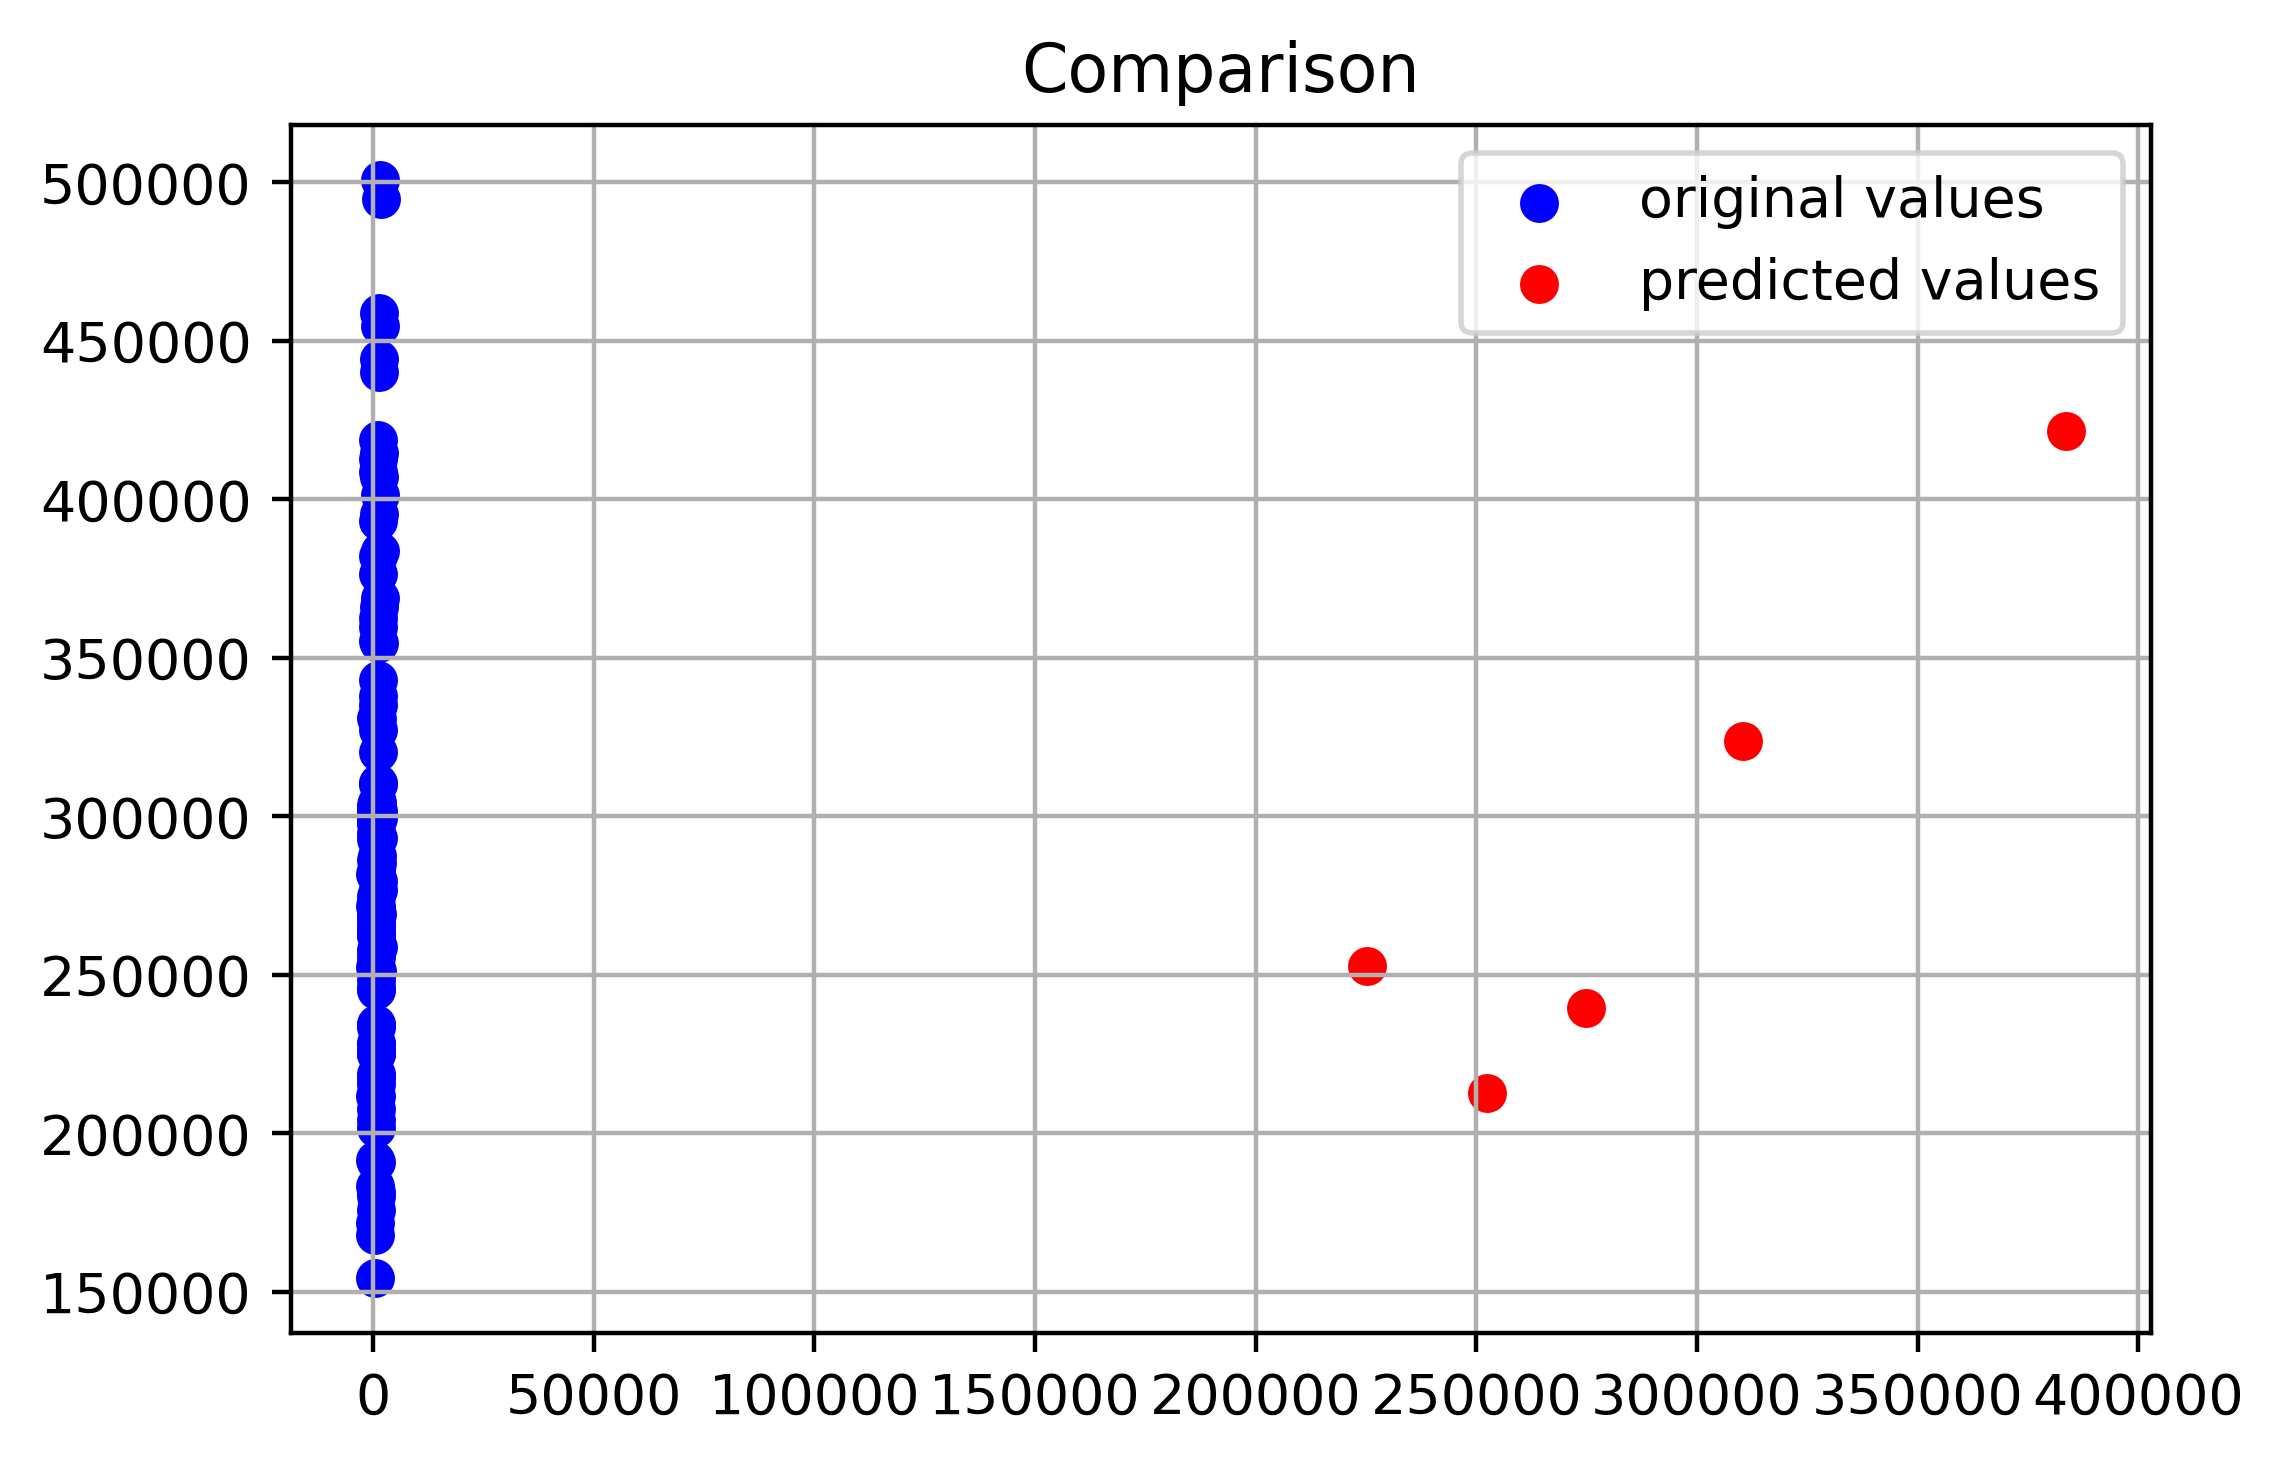

In [48]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_train)